In [1]:
%matplotlib nbagg

# PSO(Particle Swarm Optimization)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from copy import deepcopy
from plot import graph_plot
from plot import dots_anim_plot

## 目的関数

In [3]:
def sphere_func(x: list):
    return sum([val ** 2 for val in x])

def rastrign_func(x: list):
    return sum([val ** 2 - 10 * np.cos(2 * np.pi * val) + 10 for val in x])

## PSO method

In [4]:
def pso(func, M: int=30, D: int=5, c: float=1.494, w: float=0.729,
        tmax: int=1000, cr: float=1e-5, xmin: int=-5, xmax: int=5):
    """
    param <int> M : 粒子数
    param <int> D : 解の次元数
    param <float> c : PSOのパラメータ
    param <float> w : PSOのパラメータ
    param <int> Tmax : 最大試行回数
    param <float> Cr : 終了条件
    param <int> Xmin : 初期値の最小値
    param <int> Xmax : 初期値の最大値
    return <int> : 実行ステップ数
    return <float> : 方程式の値
    return <np.array> : 解のリスト
    粒子群最適化を行うメソッド
    """
    
    # 初期化処理
    # 位置
    x = (xmin - xmax) * np.random.rand(M, D) + xmax
    # 速度
    v = np.zeros((M, D))
    # 解の評価値関数
    f = np.zeros(M)
    # pbest
    fp = np.full(M, np.inf)
    xp = np.zeros((M, D))
    # gbest
    fg = float("inf")
    xg = np.zeros(D)
    # 目的関数の値
    fpbest = float("inf")
    fgbest = float("inf")
    
    fs = []
    xs = []
    
    # 実行
    for t in range(tmax):
        for i in range(M):
            f[i] = func(x[i])
            # pbest update
            if f[i] < fp[i]:
                fp[i] = f[i]
                for d in range(D):
                    xp[i][d] = x[i][d]
                # gbest update
                if fp[i] < fg:
                    xg = xp[i]
                    fg = func(xg)
        if fg < cr:
            break
        # pso update
        for i in range(M):
            for d in range(D):
                r1 = np.random.rand()
                r2 = np.random.rand()
                v[i][d] = w * v[i][d] + c * (r1 * (xp[i][d] - x[i][d]) +  r2 * (xg[d] - x[i][d]))
                x[i][d] = x[i][d] + v[i][d]
        fs.append(fg)
        xs.append(deepcopy(x))

    return (t+1, fg, xg, fs, xs)

<IPython.core.display.Javascript object>


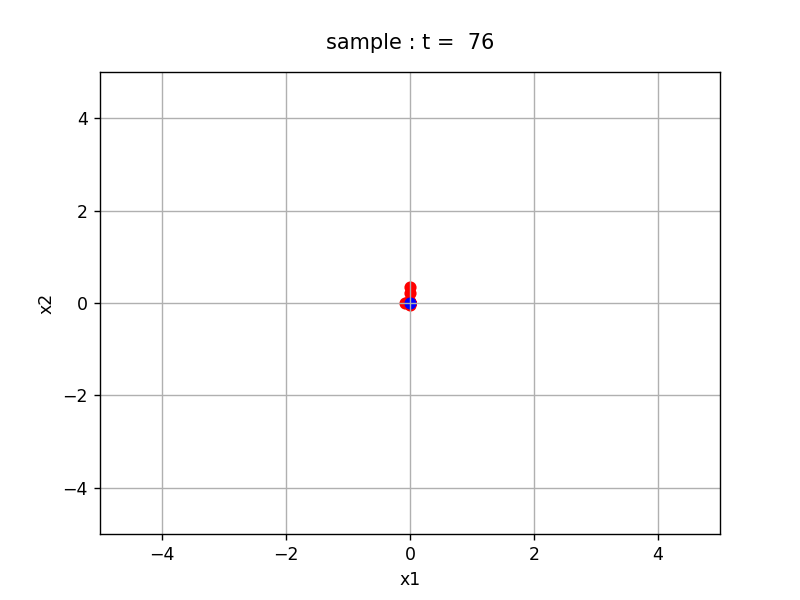

<IPython.core.display.Javascript object>


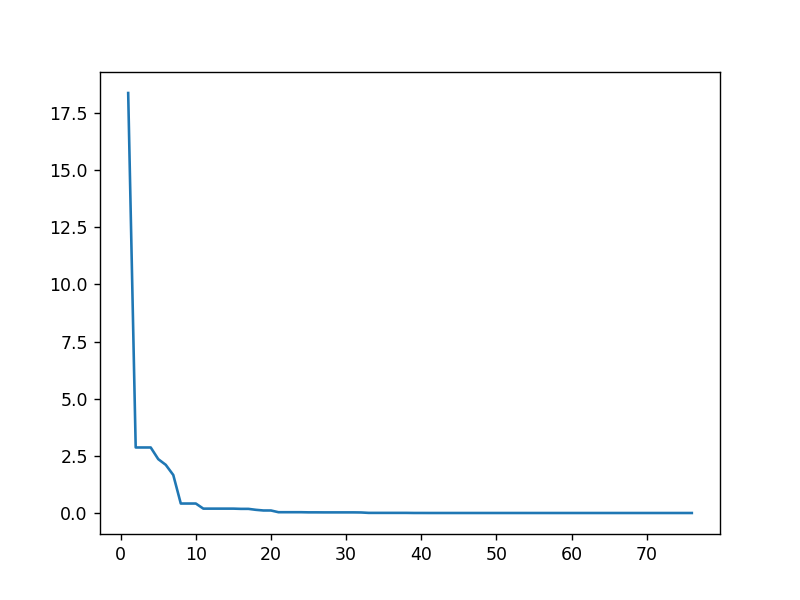

[array([[-0.03037361, -1.18539869,  5.30820247,  2.90491639, -1.12030409],
       [ 0.29882063,  3.21709602,  2.06269176, -0.50002809, -3.06173035],
       [-2.89908383,  0.85137194,  4.93353914, -0.87517129,  2.84620506],
       [ 1.51069413,  0.78536139,  3.39223938,  0.0347432 ,  2.88525862],
       [ 0.11290591,  1.49317741,  3.57184514, -1.90631224,  2.15197573],
       [-4.09432247,  2.86442224,  4.72633259,  2.70864569,  0.38614068],
       [ 3.14107724,  2.06126968, -2.30531279, -0.01081454,  2.94319491],
       [-0.48684222,  1.50006731,  4.67276714,  1.57694826,  1.93185932],
       [-0.30739871,  0.63552279,  5.9571639 , -2.86972729,  1.58825443],
       [ 0.24894326, -0.76154714,  3.21234311, -0.55509726,  2.78519827],
       [-0.53242176,  2.07750993,  1.58077512, -1.32248541,  1.98823403],
       [-1.54448494,  3.12820627,  3.44466248,  0.39586824,  1.36765278],
       [ 3.09854612,  1.79496779,  2.14300381, -1.53193157,  2.79227188],
       [ 1.44858982,  3.47997326,  2.

In [6]:
t, f, x, fs, xs = pso(sphere_func)
dots_anim_plot(xs)
graph_plot(t, fs)
print(xs)